# Week 2 - Visualizations

By Group XX:

-   Aleksandar Lukic - s194066
-   Paula Barho - s242926
-   Victor Gustav Harbo Rasmussen - s204475

As explained in in class during Lecture 1, each week of this class is an Jupyter notebook like this one. In order to follow the class, you simply start reading from the top, following the instructions.

## Overview

Today's lecture does a few things.
* First there is an introduction to data visualization incl a little exercise and a video (Part 1). 
* As the main event, we will work with crime-data and generate a large number of interesting and informative plots (Part 2,4,5).
* We will also talk a bit about what makes a good plot (Part 3).

## Part 1: A little visualization exercise

Start by downloading these four datasets: [Data 1](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data1.tsv), [Data 2](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data2.tsv), [Data 3](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data3.tsv), and [Data 4](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/data4.tsv). The format is `.tsv`, which stands for _tab separated values_. 
As you will later realize, these are famous datasets!
Each file has two columns (separated using the tab character). The first column is $x$-values, and the second column is $y$-values.  

Now, to the exercise:

In [398]:
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
from scipy import stats

In [399]:
# Set pandas display options to show all columns for .head command
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)        # Auto-detect the display width
pd.set_option('display.max_colwidth', None) # Show full content of each column

In [400]:
# Get path of data directory
files_path = os.path.abspath(os.path.join(os.pardir, "files"))
files_path

'/home/aleksandar-lukic/school/02806_Social_Data/files'

In [401]:
# Get path of plot directory
plots_path = os.path.abspath(os.path.join(os.pardir, "plots"))
plots_path

'/home/aleksandar-lukic/school/02806_Social_Data/plots'

In [402]:
# Create paths to the datasets
data_1_path = os.path.join(files_path, "data1.tsv")
data_2_path = os.path.join(files_path, "data2.tsv")
data_3_path = os.path.join(files_path, "data3.tsv")
data_4_path = os.path.join(files_path, "data4.tsv") 

# Load the datasets from the files folder
df_1 = pd.read_csv(data_1_path, sep='\t', header=None)
df_2 = pd.read_csv(data_2_path, sep='\t', header=None)
df_3 = pd.read_csv(data_3_path, sep='\t', header=None)
df_4 = pd.read_csv(data_4_path, sep='\t', header=None)

In [403]:
# Define the X and Y columns for each dataset
X1 = df_1.iloc[:, 0]
Y1 = df_1.iloc[:, 1]
X2 = df_2.iloc[:, 0]
Y2 = df_2.iloc[:, 1]
X3 = df_3.iloc[:, 0]
Y3 = df_3.iloc[:, 1]
X4 = df_4.iloc[:, 0]
Y4 = df_4.iloc[:, 1]

> *Exercise*: 
> 
> * Using the `numpy` function `mean`, calculate the mean of both $x$-values and $y$-values for each dataset. 
>      * Use python string formatting to print precisely two decimal places of these results to the output cell. Check out [this _stackoverflow_ page](http://stackoverflow.com/questions/8885663/how-to-format-a-floating-number-to-fixed-width-in-python) for help with the string formatting. <font color='grey'>You may also ask an LLM about the string formatting, but make sure it doesn't just give you the answer: Ask how string formatting works, get some examples, and solve your own problem based on that.</font>

In [404]:
# Calculate the mean values for each dataset
mean_x_1 = np.mean(X1)
mean_y_1 = np.mean(Y1)
mean_x_2 = np.mean(X2)
mean_y_2 = np.mean(Y2)
mean_x_3 = np.mean(X3)
mean_y_3 = np.mean(Y3)
mean_x_4 = np.mean(X4)
mean_y_4 = np.mean(Y4)

In [405]:
# Formating the mean values to 2 decimal places
means = [mean_x_1, mean_y_1, mean_x_2, mean_y_2, mean_x_3, mean_y_3, mean_x_4, mean_y_4]
names = ["x_1", "y_1", "x_2", "y_2", "x_3", "y_3", "x_4", "y_4"]
means_rounded = ['%.2f' % mu for mu in means]

# Formating with column names and mean values
res = zip(names, means_rounded)
print("MEANS")
print(*res, sep = "\n")

MEANS
('x_1', '9.00')
('y_1', '7.50')
('x_2', '9.00')
('y_2', '7.50')
('x_3', '9.00')
('y_3', '7.50')
('x_4', '9.00')
('y_4', '7.50')


> * Now calculate the variance for all of the various sets of $x$- and $y$-values, by using the `numpy` function `var`. <font color='grey'>You should be able to do this without any help from LLMs.</font> Print it to three decimal places.

In [406]:
# Calculate the variances for each dataset
var_x_1 = np.var(X1)
var_y_1 = np.var(Y1)
var_x_2 = np.var(X2)
var_y_2 = np.var(Y2)
var_x_3 = np.var(X3)
var_y_3 = np.var(Y3)
var_x_4 = np.var(X4)
var_y_4 = np.var(Y4)

In [407]:
# Formating the variances to 2 decimal places
vars = [var_x_1, var_y_1, var_x_2, var_y_2, var_x_3, var_y_3, var_x_4, var_y_4]
names = ["x_1", "y_1", "x_2", "y_2", "x_3", "y_3", "x_4", "y_4"]
vars_rounded = ['%.3f' % sigma for sigma in vars]

# Formating with column names and mean values
res = zip(names, vars_rounded)
print("VARIANCES")
print(*res, sep = "\n")

VARIANCES
('x_1', '10.000')
('y_1', '3.752')
('x_2', '10.000')
('y_2', '3.752')
('x_3', '10.000')
('y_3', '3.748')
('x_4', '10.000')
('y_4', '3.748')


> * Use `numpy` to calculate the [Pearson correlation](https://en.wikipedia.org/wiki/Pearson_product-moment_correlation_coefficient) between $x$- and $y$-values for all four data sets (also print to three decimal places).

In [408]:
# Calculate the Pearson correlation coefficient for each dataset
corr_1 = np.corrcoef(X1, Y1)[0][1]
corr_2 = np.corrcoef(X2, Y2)[0][1]
corr_3 = np.corrcoef(X3, Y3)[0][1]
corr_4 = np.corrcoef(X4, Y4)[0][1]

In [409]:
# Formating the correlation coefficients to 3 decimal places
corrs = [corr_1, corr_2, corr_3, corr_4]
corrs_rounded = ['%.3f' % corr for corr in corrs]

# Formating with column names and mean values
res = zip(
    ["X1", "X2", "X3", "X4"], 
    ["Y1", "Y2", "Y3", "Y4"], 
    vars_rounded
)
print("PEARSON CORRELATION COEFFICIENTS")
print(*res, sep = "\n")

PEARSON CORRELATION COEFFICIENTS
('X1', 'Y1', '10.000')
('X2', 'Y2', '3.752')
('X3', 'Y3', '10.000')
('X4', 'Y4', '3.752')


> * The next step is use _linear regression_ to fit a straight line $f(x) = a x + b$ through each dataset and report $a$ and $b$ (to two decimal places). An easy way to fit a straight line in Python is using `scipy`'s `linregress`. It works like this
> ```
> from scipy import stats
> a, b, r_value, p_value, std_err = stats.linregress(x,y)
>```

In [410]:
# Helper function to print the linear regression results
def compute_linear_regression(X, Y):
    a, b, r_value, p_value, std_err = stats.linregress(X, Y)
    print("a: ", '%.3f' % a)
    print("b: ", '%.3f' % b)
    print("R-squared: ", '%.3f' % r_value**2)
    print("P-value: ", '%.3f' % p_value)
    print("Standard error: ", '%.3f' % std_err)
    print("\n")
    return a, b, r_value, p_value, std_err

In [411]:
a_1, b_1, r_value_1, p_value_1, std_err_1 = compute_linear_regression(X1, Y1)
a_2, b_2, r_value_2, p_value_2, std_err_2 = compute_linear_regression(X2, Y2)
a_3, b_3, r_value_3, p_value_3, std_err_3 = compute_linear_regression(X3, Y3)
a_4, b_4, r_value_4, p_value_4, std_err_4 = compute_linear_regression(X4, Y4)

a:  0.500
b:  3.000
R-squared:  0.667
P-value:  0.002
Standard error:  0.118


a:  0.500
b:  3.001
R-squared:  0.666
P-value:  0.002
Standard error:  0.118


a:  0.500
b:  3.002
R-squared:  0.666
P-value:  0.002
Standard error:  0.118


a:  0.500
b:  3.002
R-squared:  0.667
P-value:  0.002
Standard error:  0.118




> * Comment on the results from the previous steps. What do you observe? 

It would seem so far, that the four datasets share very similar statistical properties. This could suggest that the dataset are identical or very similar in their datapoints.

> * Finally, it's time to plot the four datasets using `matplotlib.pyplot`. Use a two-by-two [`subplot`](http://matplotlib.org/examples/pylab_examples/subplot_demo.html) to put all of the plots nicely in a grid and use the same $x$ and $y$ range for all four plots. And include the linear fit in all four plots. (To get a sense of what I think the plot should look like, you can take a look at my version [here](https://raw.githubusercontent.com/suneman/socialdata2023/main/files/anscombe.png).) <font color='grey'>For this sub-exercise, try to write the code based on the example I link to. If you get stuck, you may use your LLM to figure it out. But don't ask it for the solution, ask for help with figuring out how to use the functions!</font>

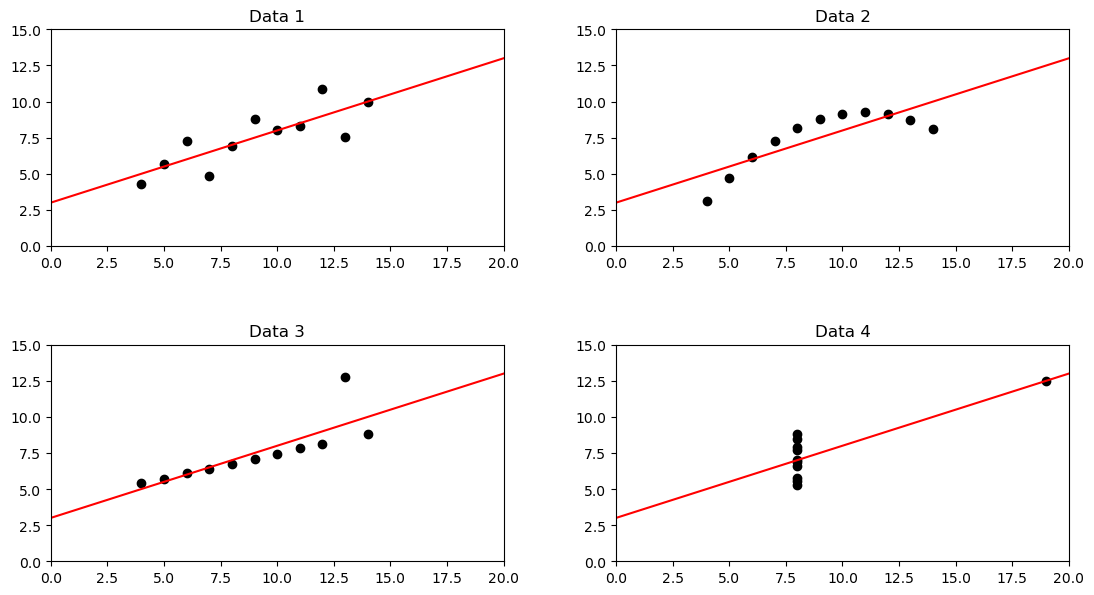

In [412]:
# Create a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 7))
fig.tight_layout(pad = 5.0)  # Increase padding to avoid overlap

# Set the same ranges of x- and y-axis for all subplots
xlim = (0, 20)
ylim = (0, 15)
plt.setp(axs, xlim=xlim, ylim=ylim)

# Plot the data points for each dataset
axs[0, 0].scatter(X1, Y1, color='black', label='Data 1')
axs[0, 0].set_title('Data 1')
axs[0, 1].scatter(X2, Y2, color='black', label='Data 2')
axs[0, 1].set_title('Data 2')
axs[1, 0].scatter(X3, Y3, color='black', label='Data 3')
axs[1, 0].set_title('Data 3')
axs[1, 1].scatter(X4, Y4, color='black', label='Data 4')
axs[1, 1].set_title('Data 4')

# Plot the linear regression lines
x = np.array(xlim)

def fx(x, a, b):
    return a*x + b

axs[0, 0].plot(x, fx(x, a_1, b_1), color='red')
axs[0, 1].plot(x, fx(x, a_2, b_2), color='red')
axs[1, 0].plot(x, fx(x, a_3, b_3), color='red')
axs[1, 1].plot(x, fx(x, a_4, b_4), color='red')

plt.savefig(os.path.join(plots_path, "W2_ex1_scatterplot.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * Explain - in your own words - what you think my point with this exercise is (see below for tips on this). <font color='grey'>Again, try to write down your own thoughts first. Then you can ask your LLM for help after that</font>.

As shown in the plots, the regression for all of the dataset are almost identical. However, this is simply a very intricate coinsidence, as the points are placed in a way which make the linear regression limited in its effectivness. These exact datasets are what makes up [_Anscombe's quartet_](https://en.wikipedia.org/wiki/Anscombe%27s_quartet). 

> * <font color='grey'>What did you get out of asking the LLM about the previous sub-question? How did you even go about asking the LLM about the point of the entire set of questions? Reflect on whether or not the LLM helped you get smarter?</font>

We did not use any LLM for this exercise. Simply using google and reading the documentation was enough.

> *Excercise:* Questions for this [YouTube Lecture](https://www.youtube.com/watch?v=9D2aI30AMhM&ab_channel=SuneLehmann). 
> 
> * What is the difference between *data* and *metadata*? How does that relate to the GPS tracks-example?

In the context of data for statistical data analysis, _Data_ are the measurements, numbers, text, etc. which we use to explain stuff. _Metadata_ is the contextual information about the data we are using.

_**Data**_: The longitude and latitude decimal values measured on a bike trip.

_**Metadata**_: The variables names and comments in the dataset file, which helps us understand what the values represent, e.g. `lon=123.456, lat=123.456`

> * Sune says that the human eye is a great tool for data analysis. Do you agree? Explain why/why not. Mention something that the human eye is very good at. Can you think of something that [is difficult for the human eye](http://cdn.ebaumsworld.com/mediaFiles/picture/718392/84732652.jpg). Explain why your example is difficult. 

Sune explains how our eyes collect the information in front of us, and then how we percieve it. He highlights the eye's capibility of seeing the bigger picture, whereas simple statistics might fail. This is clearly demonstrated in the previous execise in this notebook with the Anscombe's quartet. 

In Sune's example, 1 vs 1000 can be presented visually in different way to convey the meaning. The magnitude of difference between data points can be hard to grasp conceptually, but if we manage to present it more visually aggresively, it can transmit the underlying information more clearly, e.g. the dots and the lines from Sune's examples. 

> * Simpson's paradox is hard to explain. Come up with your own example - or find one on line.

The _Simpson's Paradox_ explains how aggregated data may show misleading trends, while its underlying sub-classifications may show more accurately described isolated trends.  

> * In your own words, explain the differnece between *exploratory* and *explanatory* data analysis.

**Exploratory Data Analysis** is when we are looking to test or explore a hypothesis or looking for mmeaning within a dataset.

**Explanatory Data Analysis** is when we are aware of trends within a dataset and want to convey this information to others.

## Part 2: Visualizing patterns in the data

Let's see if we can detect any interesting patterns in the big crime-data file from San Francisco you downloaded last week. We'll again only look at the focus-crimes.

In [413]:
focuscrimes = set([
    'ASSAULT',
    'BURGLARY',
    'DRUG/NARCOTIC',
    'DRUNKENNESS',
    'LARCENY/THEFT',
    'PROSTITUTION',
    'ROBBERY',
    'STOLEN PROPERTY',
    'TRESPASS',
    'VANDALISM',
    'VEHICLE THEFT',
    'WEAPON LAWS',
])

> *Exercise*: More temporal patterns. Last time we plotted the development over time (how each of the focus crimes changed over time, year-by-year). Today we'll start by looking at the developments across the months, weekdays, and across the 24 hours of the day. 
>
> **Note:** restrict yourself to the dataset of *entire years*.
>

In [414]:
# Read crime data from the CSV file
data_path = os.path.abspath(os.path.join(os.pardir, "data"))
csv_name = "Police_Department_Incident_Reports_Complete.csv"
df = pd.read_csv(os.path.join(data_path, csv_name))
df.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month No.,Month,Year
0,ASSAULT,SOUTHERN,-122.388380,37.783310,Thursday,0,1,1,January,2004
1,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
2,ASSAULT,CENTRAL,-122.419581,37.789214,Thursday,0,1,1,January,2004
3,FORGERY/COUNTERFEITING,SOUTHERN,-122.403405,37.775421,Thursday,0,1,1,January,2004
4,SUSPICIOUS OCC,NORTHERN,-122.425122,37.787848,Thursday,0,1,1,January,2004


In [415]:
# Extract only the rows where the "Category" is in the focus_crimes list
df_focus = df[df['Category'].isin(focuscrimes)]
df_focus.head()

,Category,Police District,Longitude (X),Latitude (Y),Day of Week,Hour,Day,Month No.,Month,Year
0,ASSAULT,SOUTHERN,-122.388380,37.783310,Thursday,0,1,1,January,2004
1,VANDALISM,NORTHERN,-122.428505,37.779534,Thursday,0,1,1,January,2004
2,ASSAULT,CENTRAL,-122.419581,37.789214,Thursday,0,1,1,January,2004
8,STOLEN PROPERTY,TARAVAL,-122.450635,37.715772,Thursday,0,1,1,January,2004
9,WEAPON LAWS,INGLESIDE,-122.432676,37.730713,Thursday,0,1,1,January,2004


> * *Weekly patterns*. Basically, we'll forget about the yearly variation and just count up what happens during each weekday. [Here's what my version looks like](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/weekdays.png). Some things make sense - for example `drunkenness` and the weekend. But there are some aspects that were surprising to me. Check out `prostitution` and mid-week behavior, for example!?

In [416]:
# Make dictonary of abbreviations for the days of the week
days_long = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
days_abrv = ['MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN']

days = dict(zip(days_long, days_abrv))
print("DICTONARY OF ABBREVIATIONS\nFOR THE DAYS OF THE WEEK")
for d in days:
    print([d, days[d]], sep="\n")

# Group by category and day of the week, then count occurrences
day_groupings = df_focus.groupby(['Category', 'Day of Week']).size().unstack().reindex(columns = days_long)
day_groupings

DICTONARY OF ABBREVIATIONS
FOR THE DAYS OF THE WEEK
['Monday', 'MON']
['Tuesday', 'TUE']
['Wednesday', 'WED']
['Thursday', 'THU']
['Friday', 'FRI']
['Saturday', 'SAT']
['Sunday', 'SUN']


Day of Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
ASSAULT,29110,28700,28982,28668,31372,33485,32818
BURGLARY,19315,19402,20154,19790,22531,18121,17036
DRUG/NARCOTIC,18205,21283,23686,20843,18189,15520,14644
DRUNKENNESS,1129,1036,1107,1080,1343,1755,1792
LARCENY/THEFT,98506,97806,101773,101145,113364,111207,100343
PROSTITUTION,1117,2686,2947,3375,2543,1695,1129
ROBBERY,10204,10012,10053,9965,10373,10892,10514
STOLEN PROPERTY,2168,2227,2413,2185,2162,2042,1957
TRESPASS,5406,5655,5696,5384,5457,4774,4602


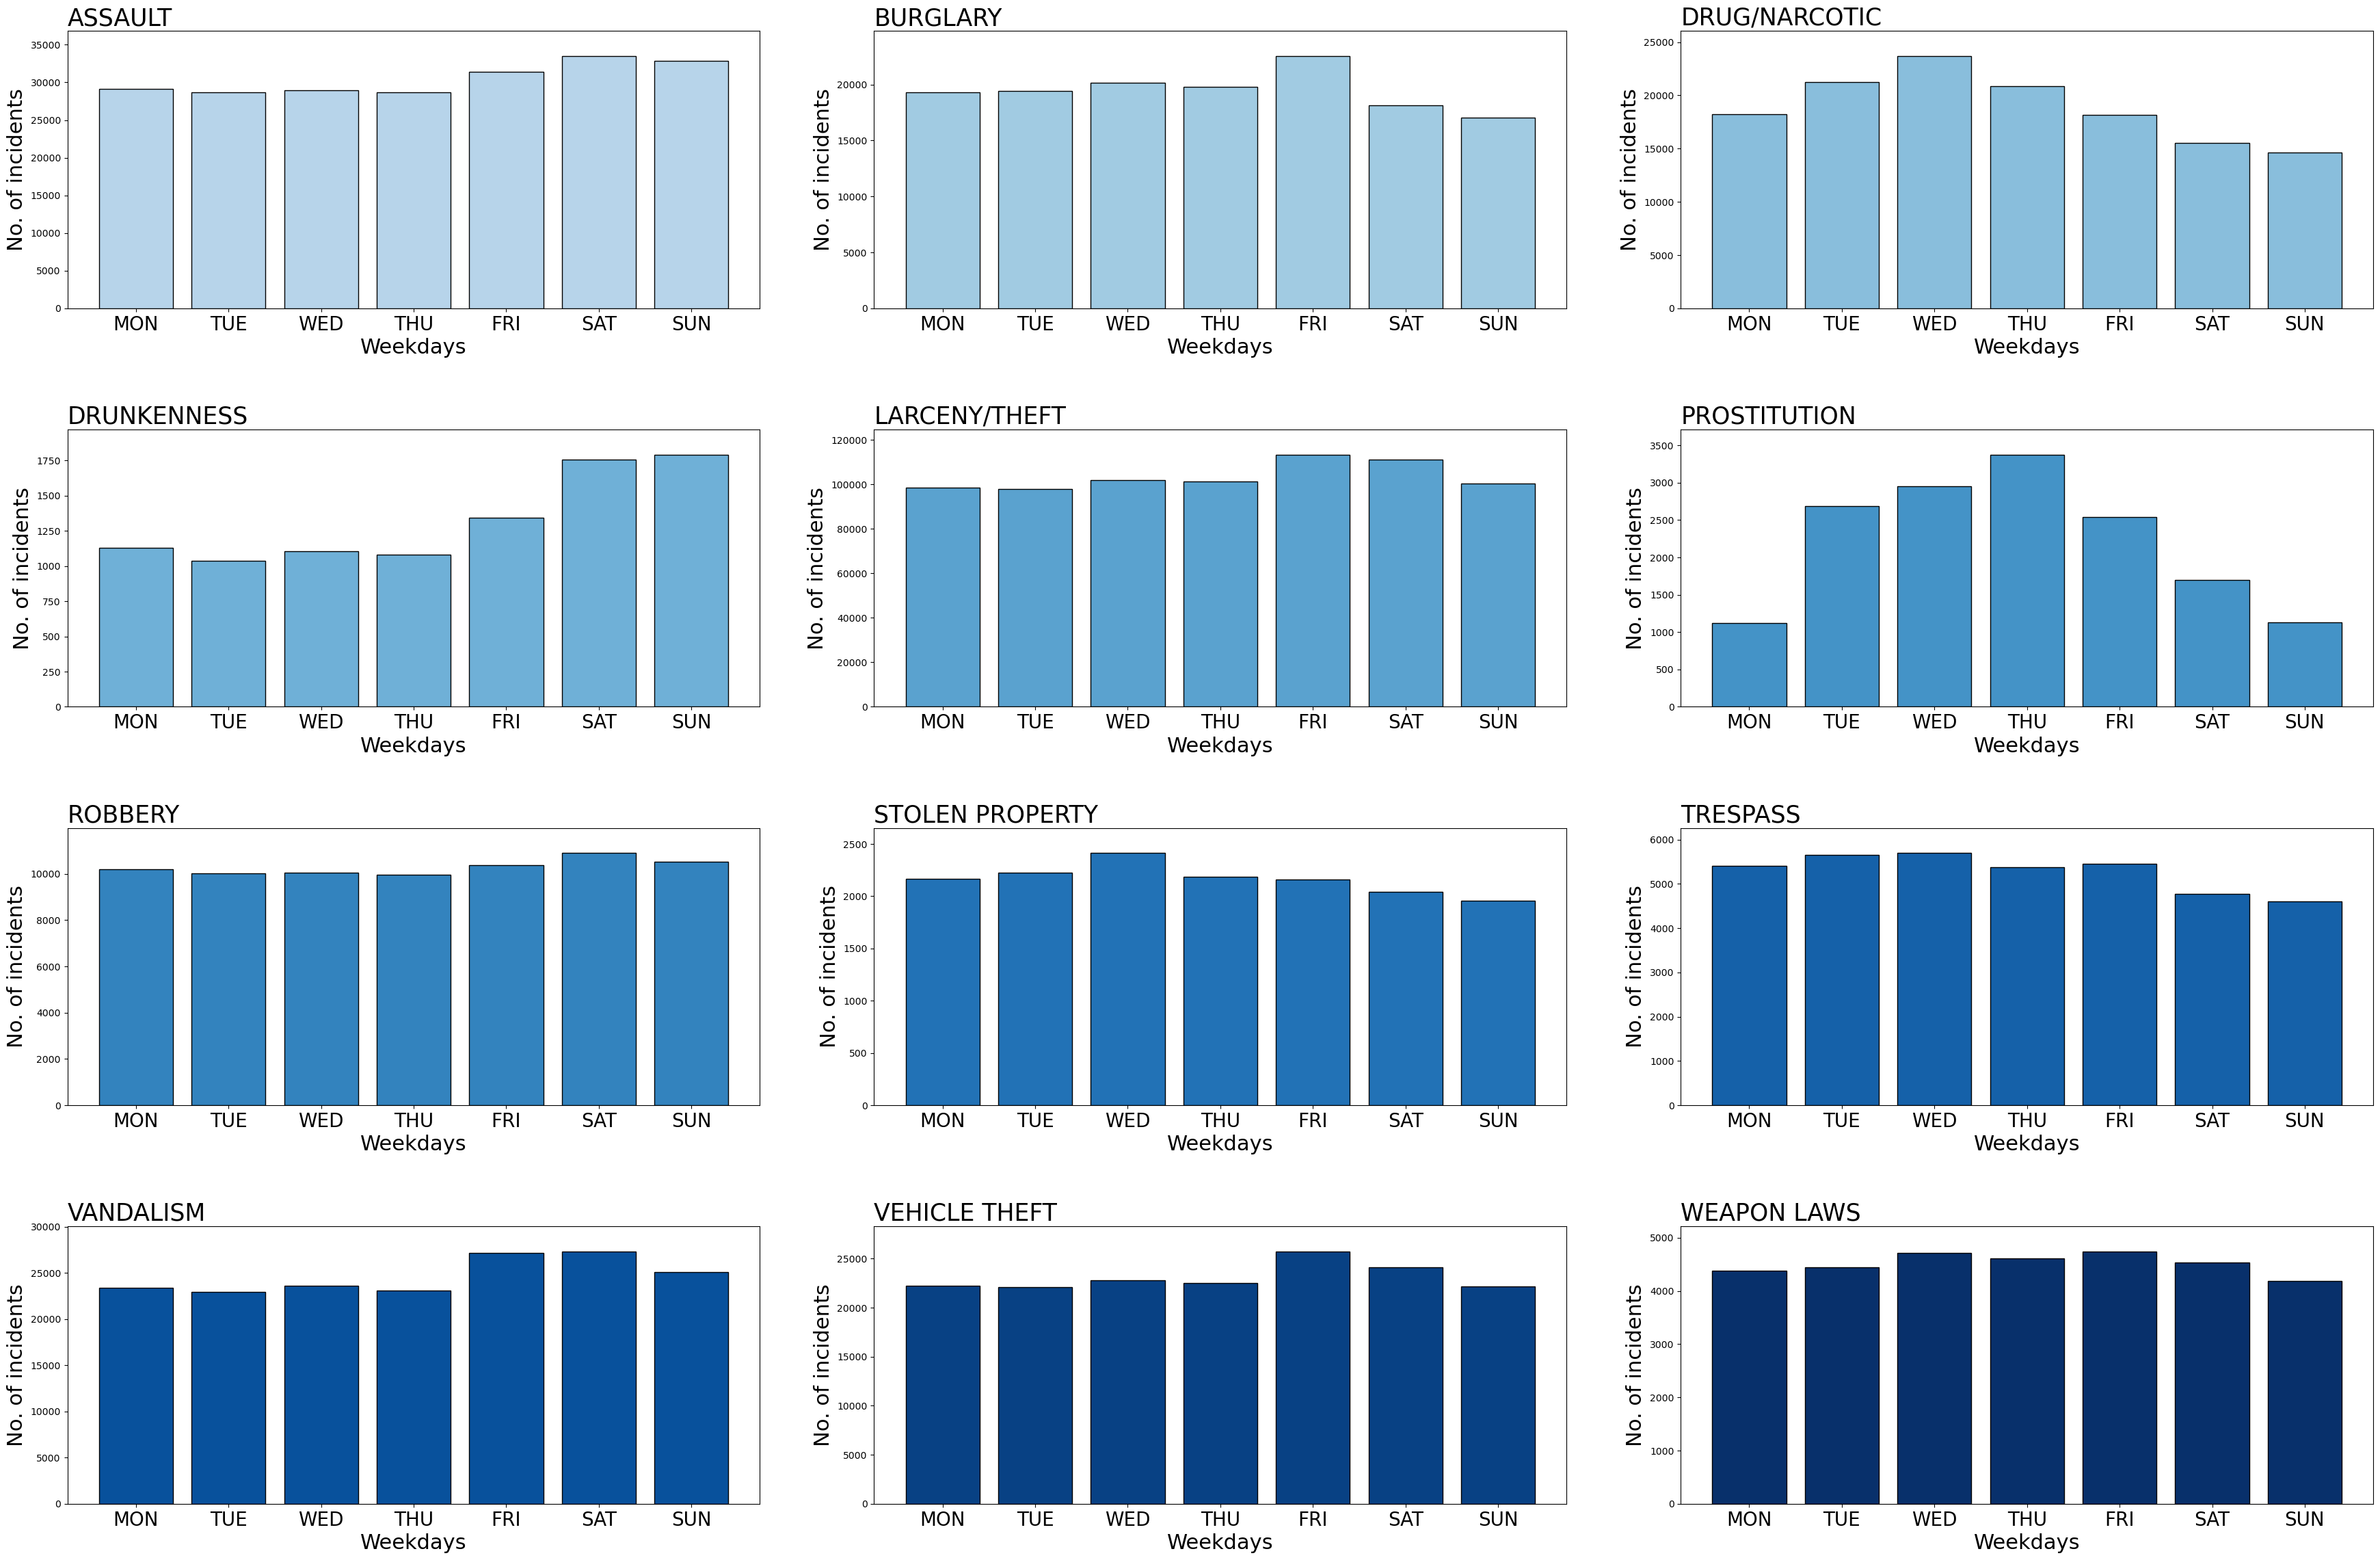

In [472]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades of green
colors = plt.cm.Blues(np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes)/no_cols)
col_size = 12
row_size = 6

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        col_size*no_cols,  # Hardcoded width of 8 inches per column 
        row_size*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# PLOTTING THE DATA
for i, (category, count) in enumerate(day_groupings.iterrows()):
    axs[i].bar(days_abrv, count, color=colors[i], edgecolor='black')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        count.max()*1.1)
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize)
    axs[i].set_xticks(days_abrv)
    axs[i].tick_params(axis='x', labelsize = tick_fontsize)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Weekdays', fontsize = label_fontsize)

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W1_ex2_catperday.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * *The months*. We can also check if some months are worse by counting up number of crimes in Jan, Feb, ..., Dec. Did you see any surprises there?

In [418]:
# Make dictonary of abbreviations for the days of the week
months_long = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_abrv = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

months = dict(zip(months_long, months_abrv))
print("DICTONARY OF ABBREVIATIONS\nFOR THE MONTHS OF THE YEAR")
for m in months:
    print([m, months[m]], sep="\n")

# Group by category and months, then count occurrences
month_groupings = df_focus.groupby(['Category', 'Month']).size().unstack().reindex(columns = months_long)
month_groupings

DICTONARY OF ABBREVIATIONS
FOR THE MONTHS OF THE YEAR
['January', 'JAN']
['February', 'FEB']
['March', 'MAR']
['April', 'APR']
['May', 'MAY']
['June', 'JUN']
['July', 'JUL']
['August', 'AUG']
['September', 'SEP']
['October', 'OCT']
['November', 'NOV']
['December', 'DEC']


Month,January,February,March,April,May,June,July,August,September,October,November,December
Category,,,,,,,,,,,,
ASSAULT,17915,16767,18867,18231,18181,17483,17625,17960,18566,18698,16640,16202
BURGLARY,12204,10567,11634,11532,11767,10761,11996,11528,10928,10954,10884,11594
DRUG/NARCOTIC,12361,11868,12544,10962,11041,9699,10656,11441,10779,11214,10435,9370
DRUNKENNESS,777,704,808,753,833,743,737,837,778,856,698,718
LARCENY/THEFT,63467,55843,59963,57798,58594,58536,63027,63864,60951,63588,58739,59774
PROSTITUTION,1538,1410,1282,1366,1266,1122,1155,1252,1450,1227,1246,1178
ROBBERY,6214,5752,5843,5839,5994,6032,6071,6383,5888,6327,5846,5824
STOLEN PROPERTY,1458,1237,1348,1260,1255,1169,1226,1314,1270,1291,1142,1184
TRESPASS,3293,2848,3252,3204,3246,2963,3055,3196,3141,3064,2911,2801


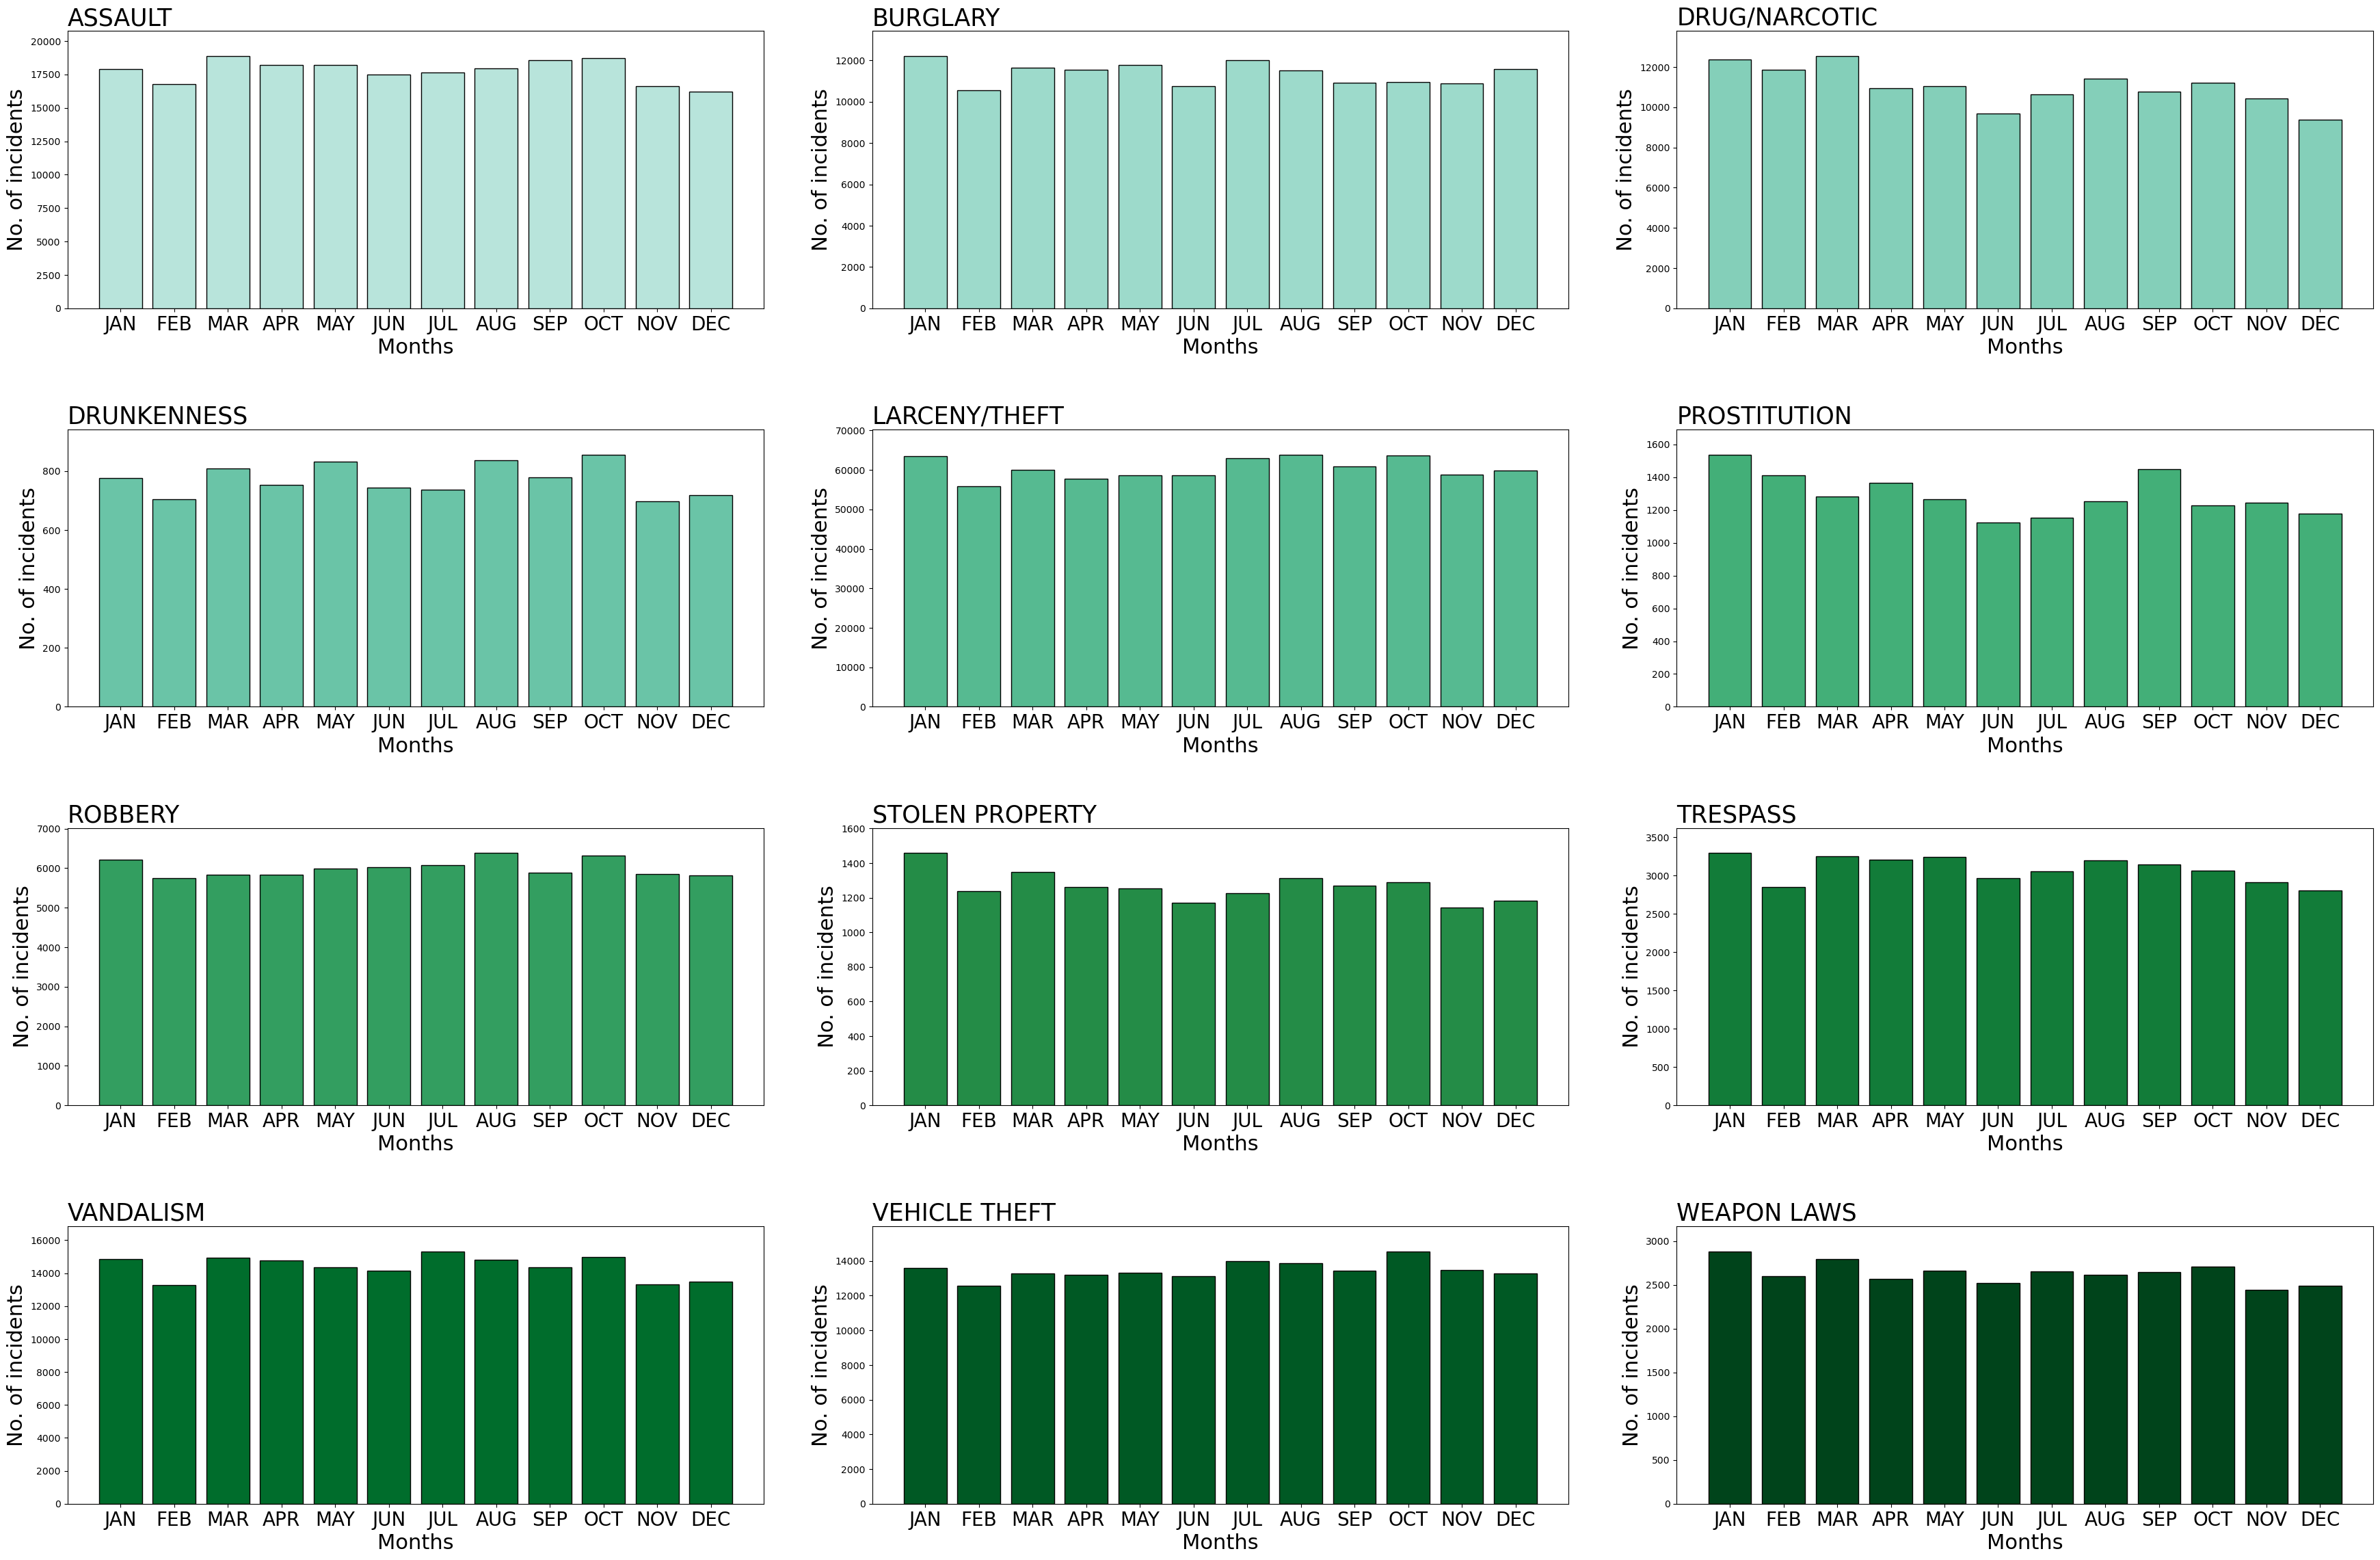

In [473]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades of green
colors = plt.cm.BuGn(np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes)/no_cols)

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        12*no_cols,  # Hardcoded width of 8 inches per column 
        6*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# PLOTTING THE DATA
for i, (category, count) in enumerate(month_groupings.iterrows()):
    axs[i].bar(months_abrv, count, color=colors[i], edgecolor='black')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        count.max()*1.1)
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize)
    axs[i].set_xticks(months_abrv)
    axs[i].tick_params(axis='x', labelsize = tick_fontsize)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Months', fontsize = label_fontsize)

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W1_ex2_catpermonth.pdf"), format="pdf", bbox_inches="tight")
plt.show()

> * *The 24 hour cycle*. We can also forget about weekday and simply count up the number of each crime-type that occurs in the dataset from midnight to 1am, 1am - 2am ... and so on. Again: Give me a couple of comments on what you see. 

In [420]:
# Make dictonary of abbreviations for the days of the week
hours_long = list(range(24))
hours_abrv = [f"{h:02d}" for h in hours_long]

hours = dict(zip(hours_long, hours_abrv))
print("DICTONARY OF ABBREVIATIONS\nFOR THE HOURS OF THE DAY")
for h in hours:
    print([h, hours[h]], sep="\n")

# Group by category and months, then count occurrences
hour_groupings = df_focus.groupby(['Category', 'Hour']).size().unstack().reindex(columns = hours_long)
hour_groupings

DICTONARY OF ABBREVIATIONS
FOR THE HOURS OF THE DAY
[0, '00']
[1, '01']
[2, '02']
[3, '03']
[4, '04']
[5, '05']
[6, '06']
[7, '07']
[8, '08']
[9, '09']
[10, '10']
[11, '11']
[12, '12']
[13, '13']
[14, '14']
[15, '15']
[16, '16']
[17, '17']
[18, '18']
[19, '19']
[20, '20']
[21, '21']
[22, '22']
[23, '23']


Hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Category,,,,,,,,,,,,,,,,,,,,,,,,
ASSAULT,11263,10213,8999,4506,3058,2577,3271,4856,7008,7972,8702,9589,11467,10403,10565,11669,11681,11438,11336,10885,10597,10859,10307,9914
BURGLARY,6346,4218,5047,5785,5557,4465,3434,4067,5934,5290,5221,4835,6803,4370,5005,5792,6706,8775,8525,6711,6220,5880,5915,5448
DRUG/NARCOTIC,4026,2457,2025,1397,989,571,1642,3614,4560,5151,5814,6693,7452,9426,10218,9798,9986,9707,8341,6971,5355,5131,5981,5065
DRUNKENNESS,767,742,631,247,122,44,77,154,136,162,183,274,275,273,316,356,426,488,541,511,547,579,707,684
LARCENY/THEFT,31134,17610,11702,8270,5893,5765,8190,11866,20074,24241,31652,36448,44695,38192,38514,40350,41727,48161,56411,52857,46681,38026,35032,30653
PROSTITUTION,1426,1097,805,551,469,506,455,241,145,152,188,209,487,305,304,256,306,521,893,1166,908,1049,1429,1624
ROBBERY,3625,3760,3757,2270,1518,1360,1285,1205,1435,1743,2085,2420,2746,2961,3125,3466,3788,3740,3842,3979,4323,4782,4555,4243
STOLEN PROPERTY,740,482,429,331,300,243,292,405,498,532,609,672,953,836,866,888,971,922,870,764,671,629,635,616
TRESPASS,2224,812,893,660,562,821,1497,1699,2121,1932,1892,1877,2546,1975,1798,1914,1811,1796,1646,1445,1432,1332,1194,1095


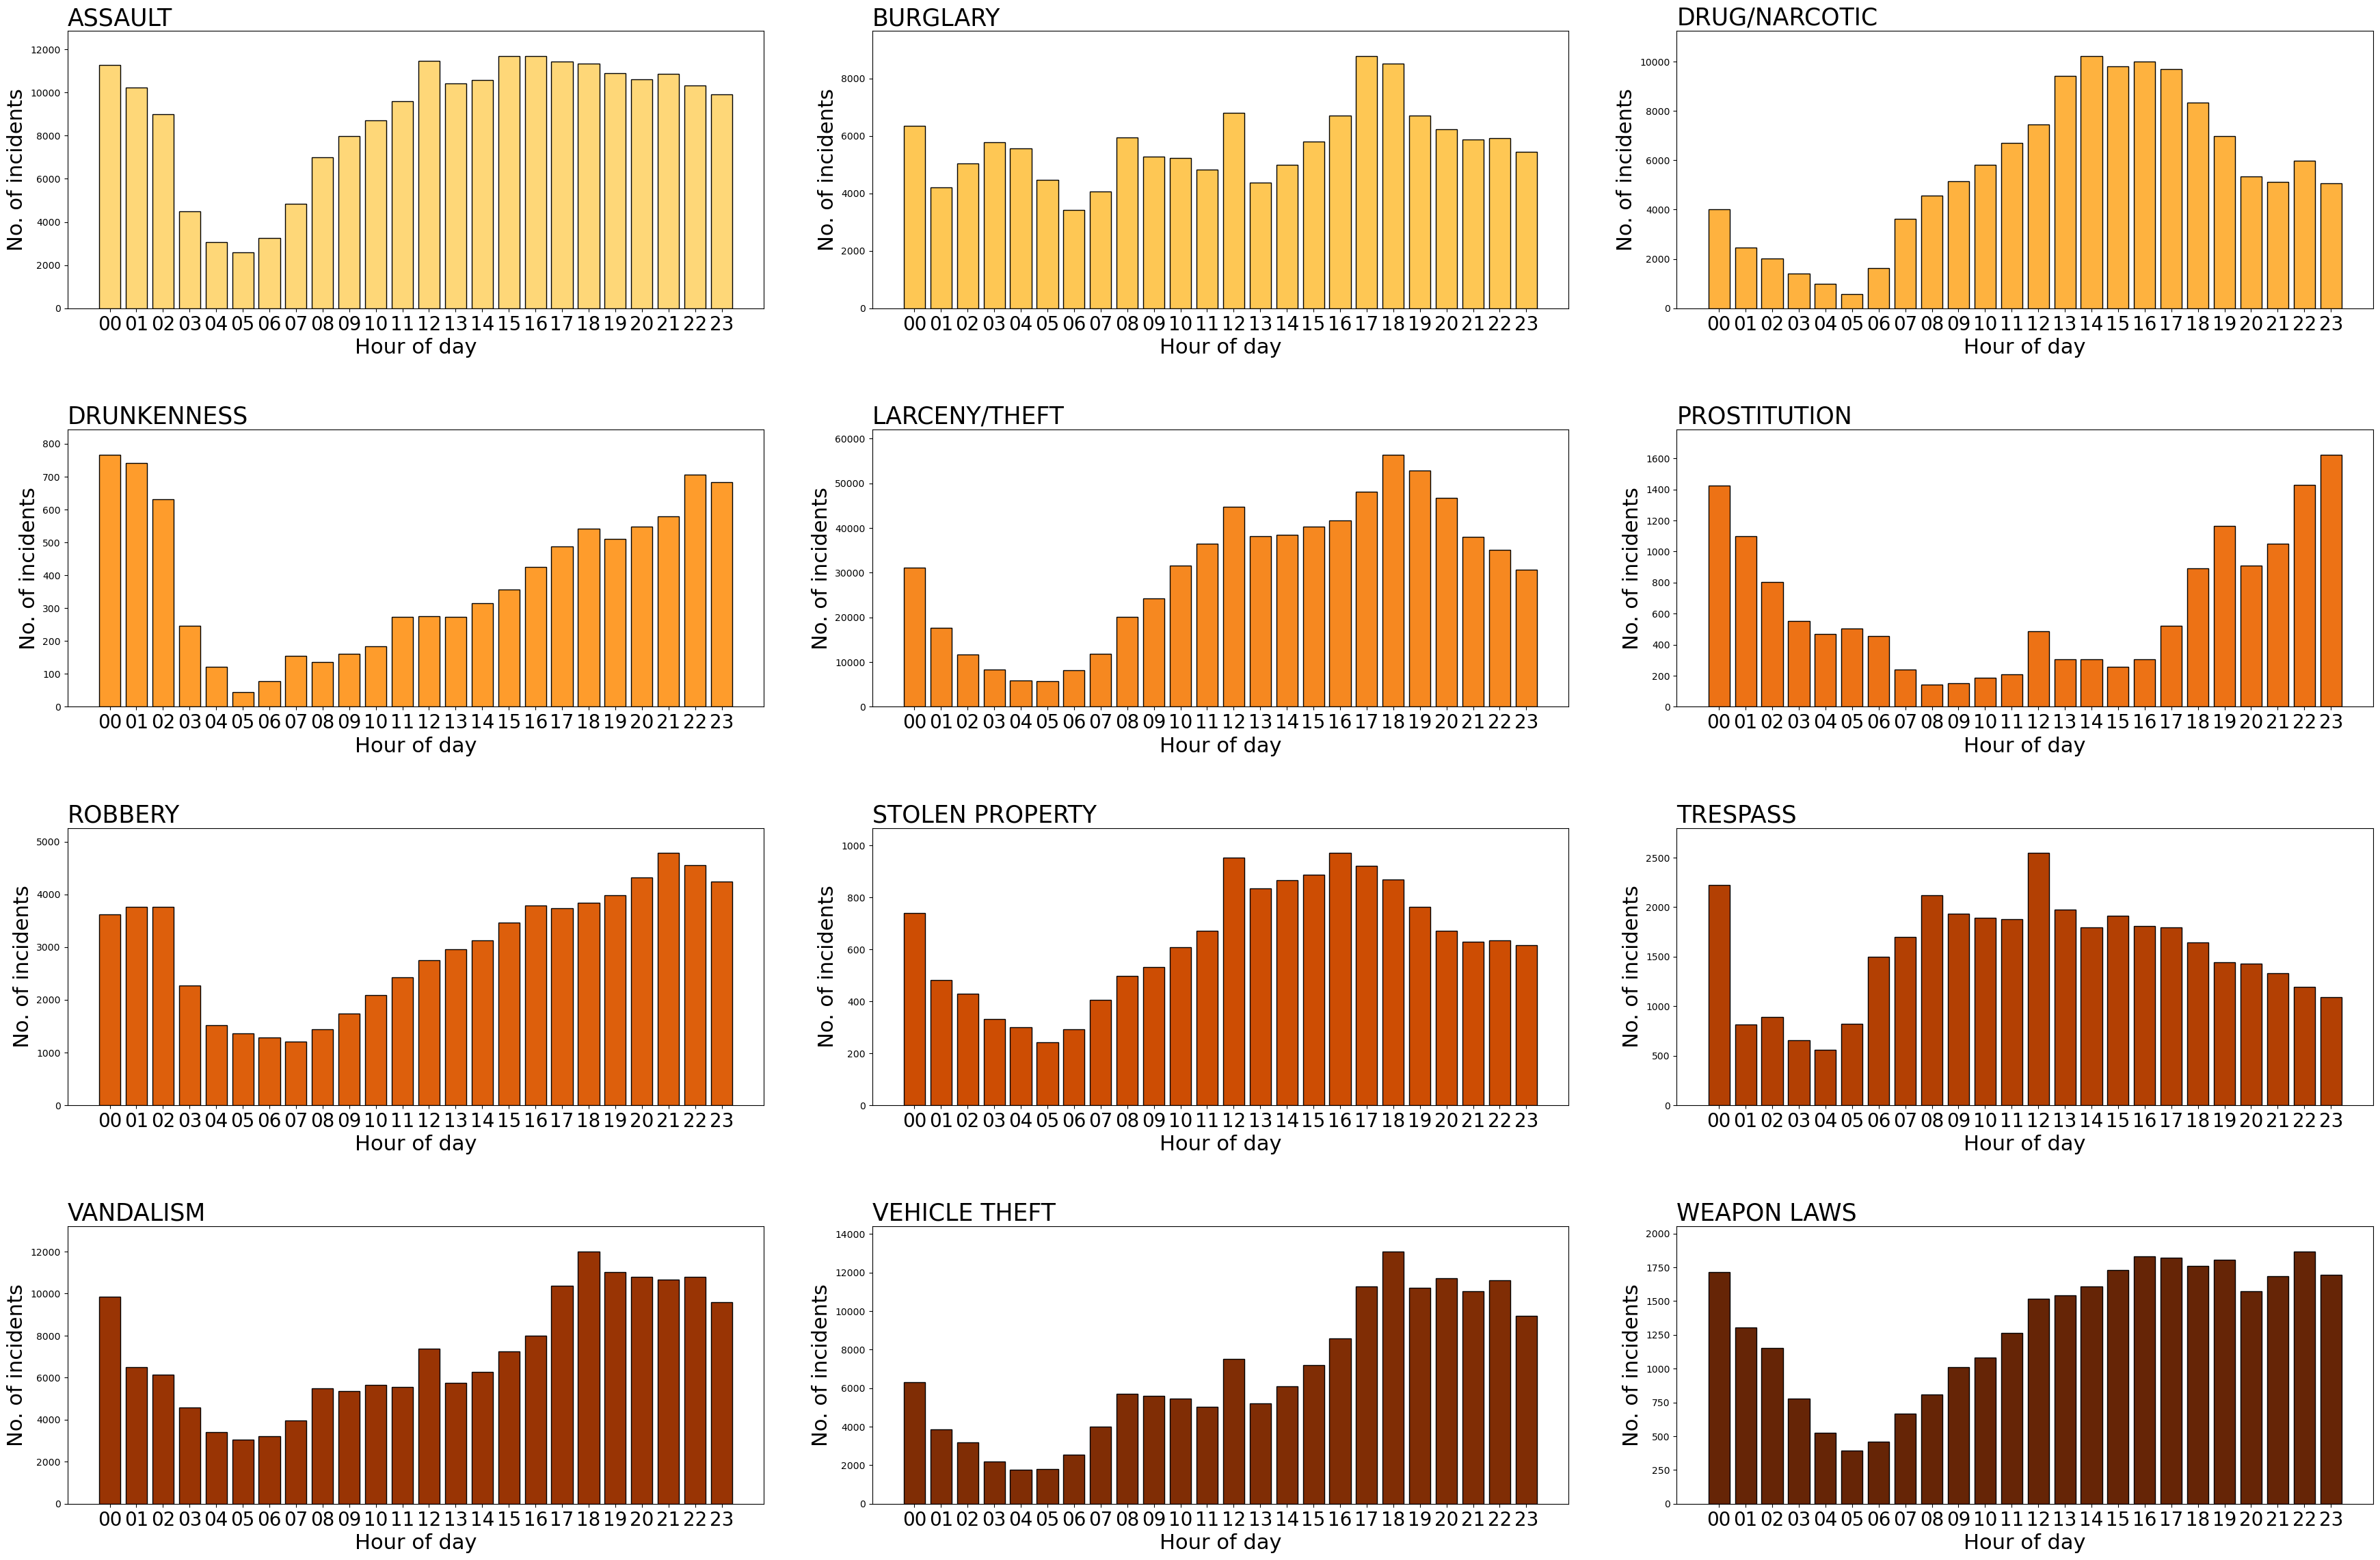

In [474]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors shades of green
colors = plt.cm.YlOrBr(np.linspace(0.3, 1, len(focuscrimes)))

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes)/no_cols)

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        12*no_cols,  # Hardcoded width of 8 inches per column 
        6*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten for easier indexing
axs = axs.flatten()

# PLOTTING THE DATA
for i, (category, count) in enumerate(hour_groupings.iterrows()):
    axs[i].bar(hours_abrv, count, color=colors[i], edgecolor='black')
    axs[i].set_ylim(
        # count.min()*0.9, # Uncomment to show the min to max span
        0, 
        count.max()*1.1)
    axs[i].set_title(category, loc='left', fontsize = subtitle_fontsize)
    axs[i].set_xticks(hours_abrv)
    axs[i].tick_params(axis='x', labelsize = tick_fontsize)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Hour of day', fontsize = label_fontsize)

fig.tight_layout(pad = 5.0)
plt.savefig(os.path.join(plots_path, "W1_ex2_catperhour.pdf"), format="pdf", bbox_inches="tight")
plt.show()

Looking at the trends, it shows that the early morning hours tend to contain less incidents compared against the rest of the day. Additionally, it seems that the incidents spike in the late afternoon to evening hours. Some of the crimes are heavily related to activities that take place in the later hours, such as drinking and prostitution. On the other side; theft and trespass suggest to be following regular opening hours of most businessess, such as grocery stores and offices.   

> * *Hours of the week*. But by looking at just 24 hours, we may be missing some important trends that can be modulated by week-day, so let's also check out the 168 hours of the week. So let's see the number of each crime-type Monday night from midninght to 1am, Monday night from 1am-2am - all the way to Sunday night from 11pm to midnight.

In [422]:
# Generate a new x-axis that spans the full week (168 hours)
hours_of_week = [f"{h:02d}" for h in range(168)]  # 0 to 167 representing hours in the week

# Prepare tick labels with day names at midnights
tick_positions = [h * 24 for h in range(7)]
tick_labels = [days_abrv[d] for d in range(7)]

# Group data: Crime count per category per hour of the week
df_focus['HourOfWeek'] = df_focus['Day of Week'].map({day: i for i, day in enumerate(days_long)}) * 24 + df_focus['Hour']
hour_week_groupings = df_focus.groupby(['Category', 'HourOfWeek']).size().unstack(fill_value=0).reindex(columns=range(168), fill_value=0)

/tmp/ipykernel_12772/1581328790.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_focus['HourOfWeek'] = df_focus['Day of Week'].map({day: i for i, day in enumerate(days_long)}) * 24 + df_focus['Hour']


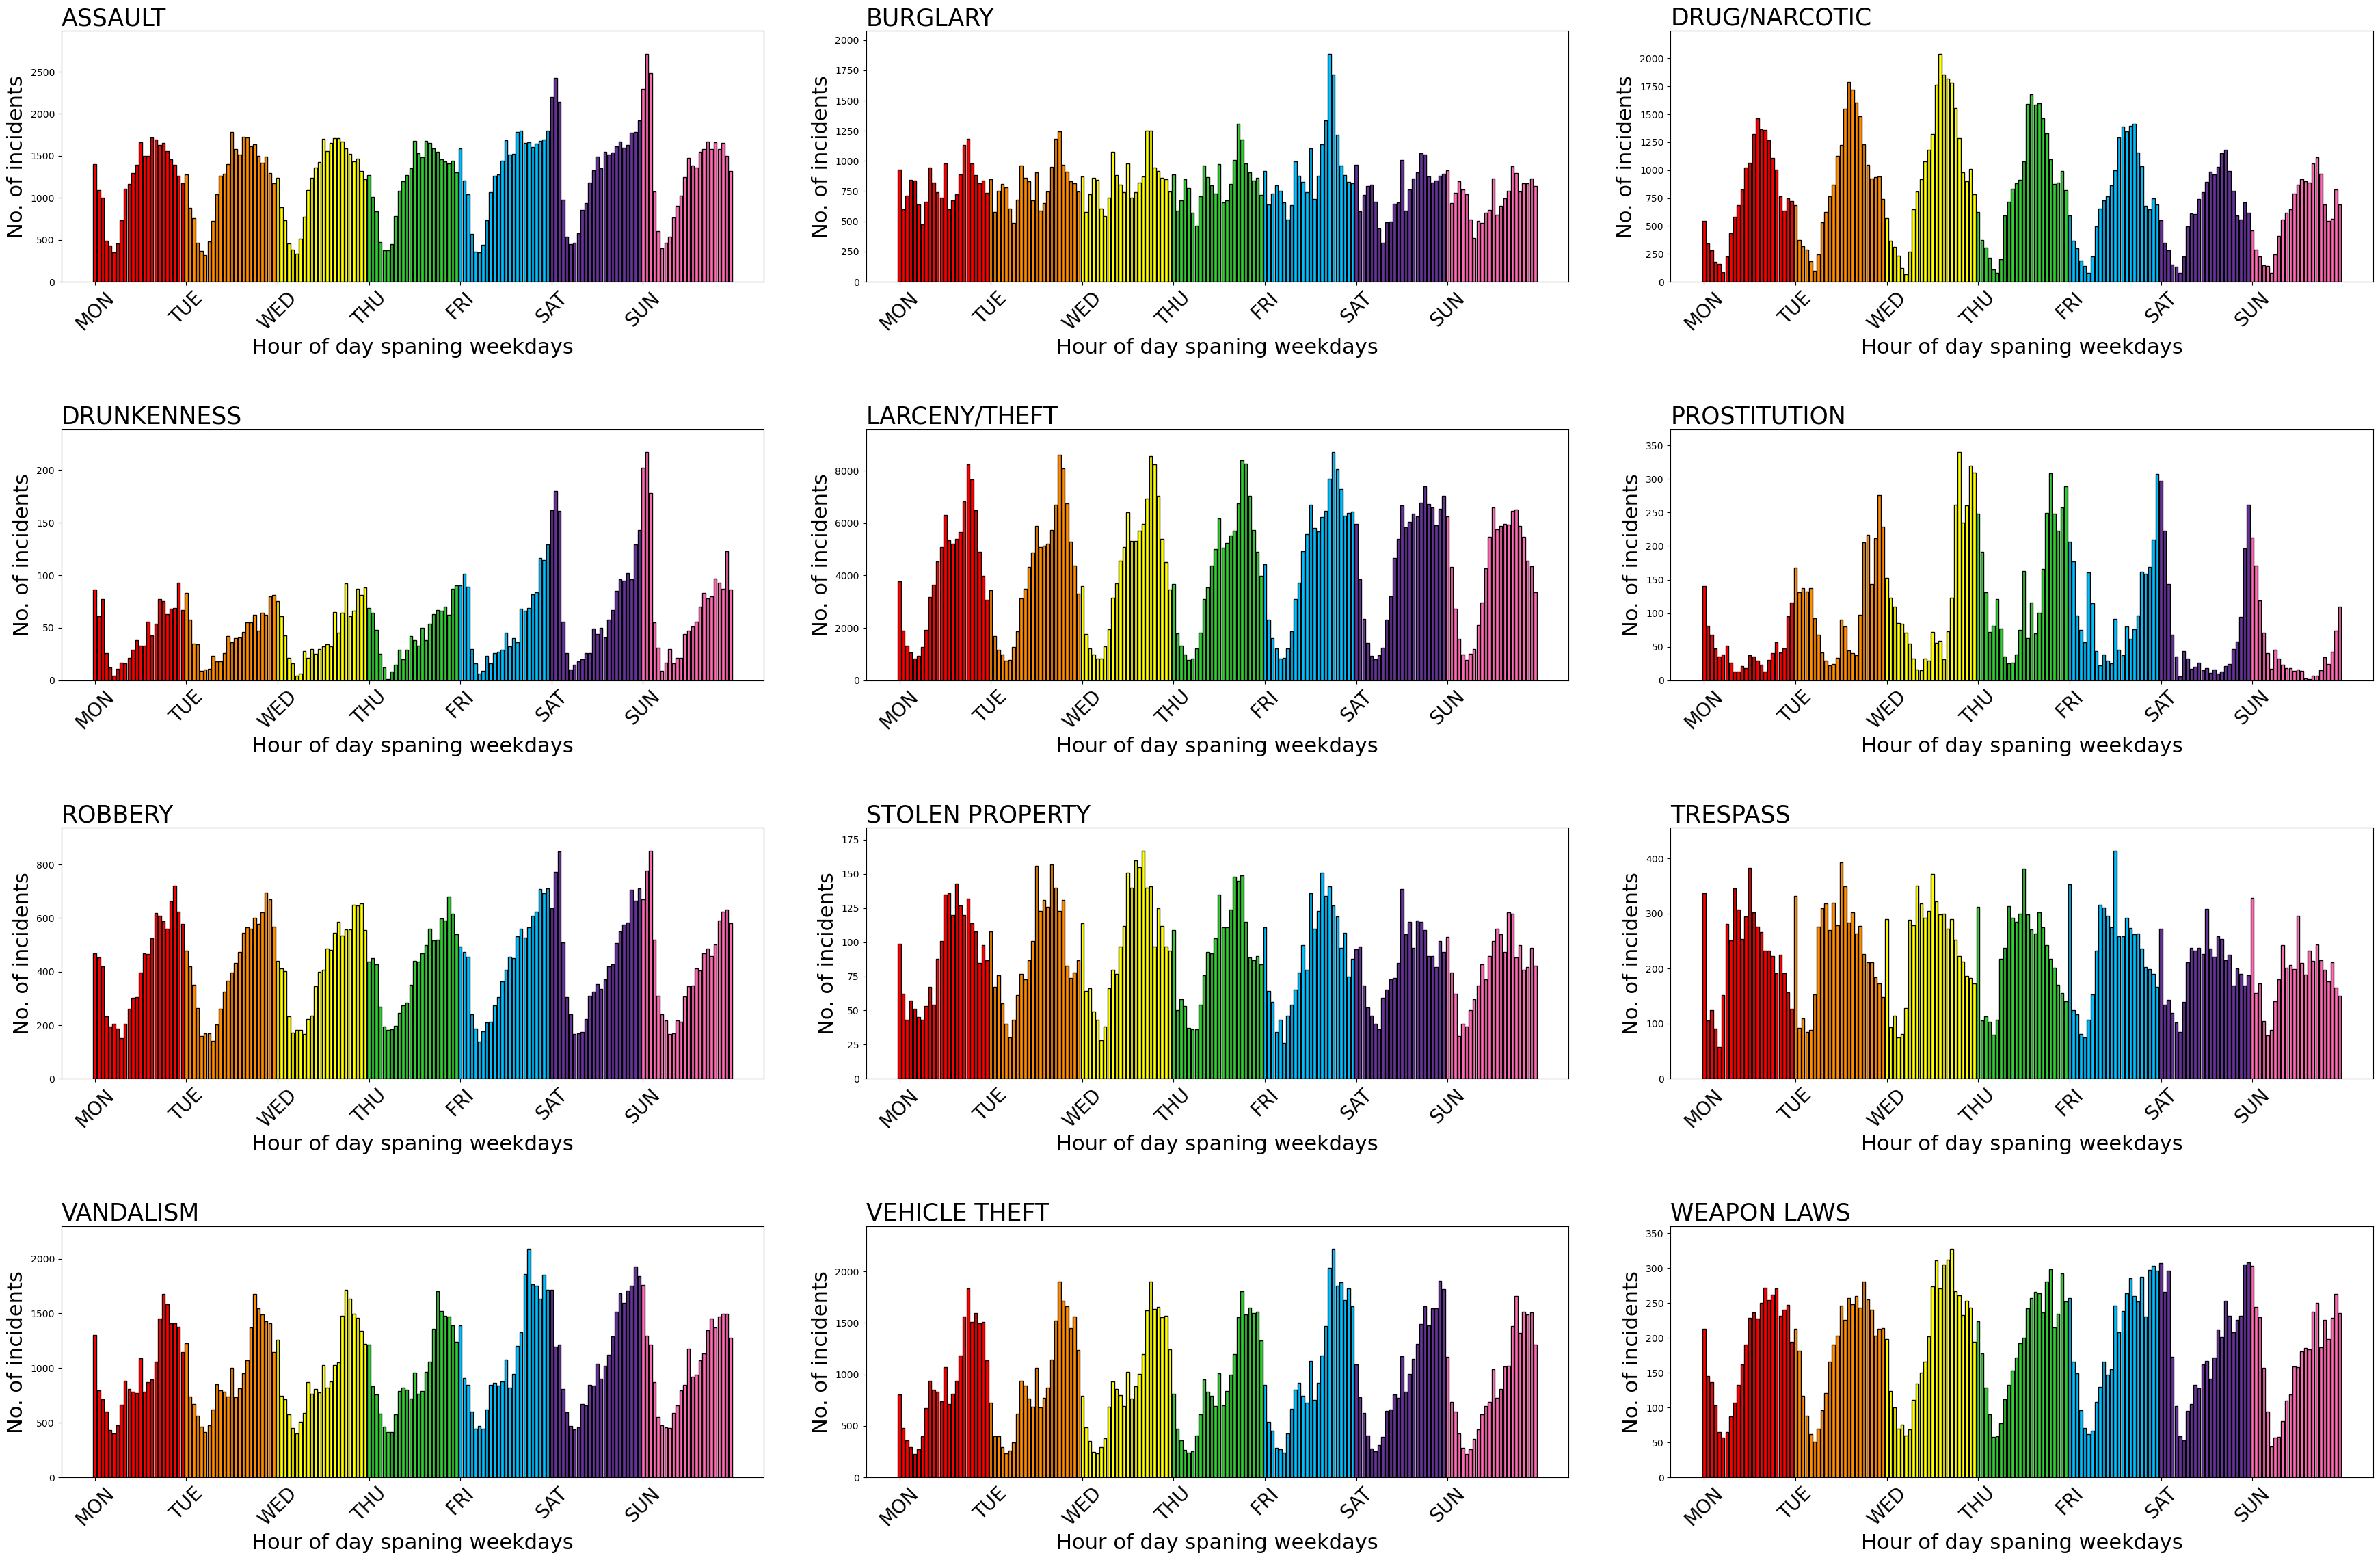

In [477]:
# Create a grid of subplots based on number of focus crimes

# Font sizes
subtitle_fontsize = 25
tick_fontsize = 20
label_fontsize = 22

# Colors
colors = ['red', 'darkorange', 'yellow', 'limegreen', 'deepskyblue', 'rebeccapurple', 'hotpink']

# Dimensions of the grid
no_cols = 3
no_rows = int(len(focuscrimes) / no_cols)

fig, axs = plt.subplots(
    no_rows,
    no_cols,
    figsize=(
        12*no_cols,  # Hardcoded width of 8 inches per column 
        6*no_rows   # Hardcoded height of 4 inches per row
    ), 
    sharex=False
)

# Flatten subplot array
axs = axs.flatten()

# Plot each category
for i, (category, count) in enumerate(hour_week_groupings.iterrows()):
    axs[i].bar(hours_of_week, count)
    axs[i].set_ylim(0, count.max() * 1.1)
    axs[i].set_title(category, loc='left', fontsize=subtitle_fontsize)

    # Set x-ticks at midnight for each day
    axs[i].set_xticks(tick_positions)  # Major ticks at midnight
    axs[i].set_xticklabels(tick_labels, fontsize=tick_fontsize)
    axs[i].tick_params(axis='x', which='both', labelrotation=45)
    axs[i].set_ylabel('No. of incidents', fontsize = label_fontsize)
    axs[i].set_xlabel('Hour of day spaning weekdays', fontsize = label_fontsize)

    # Update color for each weekday
    for d in range(7):
        for idx, bar in enumerate(axs[i].patches[0+d*24:24+d*24]):
            bar.set_color(colors[d])
            bar.set_edgecolor('black')

fig.tight_layout(pad=5.0)
plt.savefig(os.path.join(plots_path, "W1_ex2_catperhourweek.pdf"), format="pdf", bbox_inches="tight")
plt.show()

**Fun little thing**: To further make the point of the exercise in Part 1, check out this video on youtube https://www.youtube.com/watch?v=DbJyPELmhJc  

# Part 3: Creating nice plots

Ok. There's a lot of barcharts today. We need them ... they are a fantastic tool for data exploration. But it can get monotonous, so let's take a little break to talk about something else before digging deeper with the barcharts.

I want to tell you a bit about how to make nice plots. I do that in the video below

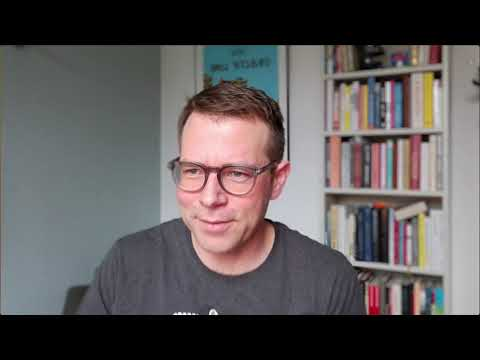

In [424]:
YouTubeVideo('9hIu4pgJXQc', width=800, height=450)

> *Exercise:* Nice plots. 
>
> * Create a list of 10 rules for nice plots based on the video.

<div class="alert alert-block alert-info">
Answer in your own words, do your own research, don't use your LLM. Once you've written down your answers, it's OK to use the LLM to get better.
</div>

# Part 4: Exploring other types of plots for temporal data

We continue our mini-break from barcharts by exploring more ways to plot temporal data.

> *Exercise:* Other cool ways to plot temporal data. I am going to introduce three different plot-types. Then your job is to choose a part of the crime-data that you care about - and plot it using these new ways of visualizing data. <font color="grey">For this one, you may use the full power of your LLM! Yes, I'm serious. Go nuts and see if you can get these plots going by fully relying on code generated by your LLM</font>. In case you want to use the *old ways* (that's of course always OK), I've included links and tips. 
>
>I recommend that you choose a different part of the crime-data for each plot-type.
> * Calendar plots. Get started on calendar plots **[here](https://calplot.readthedocs.io/en/latest/)**. There are other packages for plotting these, those are also OK to use.
> * [Polar bar chart](https://user-images.githubusercontent.com/12328192/89272649-be76e200-d63e-11ea-97ad-fd1ba5831c89.png). Here I want you to plot a 24-hour pattern of some sort -- those work really well in radial plots (another name for polar plots) because the day  wraps around on itself. You can also try plotting data with patterns from the 168 hours of the week. There's not one super-awesome solution here, you can try using [pure matplotlib](https://matplotlib.org/stable/gallery/pie_and_polar_charts/polar_bar.html) ... [some examples here](https://www.python-graph-gallery.com/circular-barplot/) or via [plotly](https://plotly.com/python/polar-chart/) (scroll down a bit for the polar barchart).
> * Time series. Time series is a key functionality of `Pandas`, so here I simply recommend starting by searching your favorite search engine for something like `time series` `pandas`
> * Reflection (<font color="grey">no LLM help here</font>): What did you learn from using LLM's to simply solve everything in this exercise (in contrast to the previous ones).

**Note**: I added this exercise with fewer hints than usual. Normally, I help you break down the problems into small solvable bits. <font color="grey">Since this is a LLM exercise, I haven't done that. But I encourage you to play with figuring out the steps in solving the problem. You can ask the LLM to help you if you like (but perhaps try yourself first and compare to what the LLM suggested).</font> 

This ties in to a bigger picture thing about data science.

*My philosophy for data science is this*: Getting to what you want rarely seems hard once you found your way there, the difficulty comes in breaking down a hard problem into the little steps you need to take to solve your complex problem. In this class, I usually do the breaking down for you and provide you with the steps (that's how you go from nothing to creating complex visualizations of crime-data). But I also want you to learn the breaking-problems-down part. <font color="grey">This is one of the areas where LLMs can be of help -- they excel at breaking down problems into smaller bits -- but if you don't try yourself, you'll never get good at it. So always create your own breakdown first, then see what the computer thinks. Perhaps it can help you get better at it 😀 </font>.

*My approach is always to think*: Even if my task seems impossible, I think: "is there any problem that I ***CAN*** solve that will get me closer to where I want to go?" Once I've solved that part, I'm smarter and I try to think: "Is there a new problem I can solve that'll get me closer knowing what I know now?" And I just keep going. Usually that's enough.

*If that seems too abstract*, a useful goal for you is to use your internet searching skills (old fashioned ones) to figure out how to make each visualization work -- look for examples, tutorials, stack overflow posts, people who have found the same error messages as you, etc, etc. <font color="grey">And of course consulting your LLM</font>.

<div class="alert alert-block alert-info">
Detailed LLM hints in gray in the text itself.
</div>

# Part 5: Back to visualizing patterns in the data

The next thing we'll be looking into is how crimes break down across the 10 districts in San Francisco. <font color="grey">See if you can do this on your own - the calculations are fairly simple. If you get stuck, you may ask your LLM for advice, but don't use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own.</font>

> *Exercise*: The types of crime and how they take place across San Francisco's police districts.
>  
>  * So now we'll be combining information about `PdDistrict` and `Category` to explore differences between SF's neighborhoods. First, simply list the names of SF's 10 police districts.
>  * Which has the most crimes? Which has the most focus crimes?
>  * Next, we want to generate a slightly more complicated graphic. I'm interested to know if there are certain crimes that happen much more in certain neighborhoods than what's typical. Below I describe how to get that plot going:
>    - First, we need to calculate the relative probabilities of seeing each type of crime in the dataset as a whole. That's simply a normalized version of [this plot](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/CrimeOccurrencesByCategory.png). Let's call it `P(crime)`.
>    - Next, we calculate that same probability distribution _but for each PD district_, let's call that `P(crime|district)`.
>    - Now we look at the ratio `P(crime|district)/P(crime)`. That ratio is equal to 1 if the crime occurs at the same level within a district as in the city as a whole. If it's greater than one, it means that the crime occurs _more frequently_ within that district. If it's smaller than one, it means that the crime is _rarer within the district in question_ than in the city as a whole.
>    - For each district plot these ratios for the 14 focus crimes. My plot (based on 2003-2018 data) looks like this
> ![Histograms](https://raw.githubusercontent.com/suneman/socialdata2022/main/files/conditional.png "histograms")
>    - Comment on the top crimes in _Tenderloin_, _Mission_, and _Richmond_. Does this fit with the impression you get of these neighborhoods on Wikipedia <font color="grey">(or from your LLM's description of those neighborhoods)</font>?
>    - What neighborhood would you prefer to live in? Explain why?
>    - <font color="grey">BONUS QUESTION. Can you get your LLM to discuss the graphic you created? (E.g. by showing it the image) Did it notice anything you didn't?</font>

<div class="alert alert-block alert-info">
Again, there are detailed LLM hints in gray in the text itself. The key advice is to always see if you can do this on your own - the calculations are fairly simple. Then ask an LLM for advice if you get stuck. Never use it to simply generate the plots. Use it as a help to get hints at how to solve the things you can't figure out on your own - that's how you get familar with how matplotlib actually works.
</div>

**Comment**. Notice how much awesome data science (i.e. learning about interesting real-world crime patterns) we can get out by simply counting and plotting (and looking at ratios). Pretty great, right? 